<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_5_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.126726,53.704961,26.049034,78.254388,-0.087130,214.047978,214.357204,-0.309226
1,0.0,1.0,32.382379,80.406129,81.174635,65.887576,-0.887190,268.963529,269.730730,-0.767200
2,0.0,2.0,31.167431,37.224015,25.116927,55.689435,-0.480092,158.717716,159.146743,-0.429027
3,0.0,3.0,81.689579,88.190807,87.229203,90.937476,-0.268935,357.778130,358.366243,-0.588113
4,0.0,4.0,88.310909,54.781255,90.720186,55.602149,-1.423887,297.990612,299.443336,-1.452724
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,26.918302,86.487024,51.346957,35.949169,-0.360977,210.340474,210.545096,-0.204622
29996,999.0,26.0,45.922760,80.383698,68.751681,22.978363,-1.122626,226.913877,228.253855,-1.339978
29997,999.0,27.0,75.983453,73.527111,39.255017,38.764006,-0.743778,236.785809,237.414096,-0.628287
29998,999.0,28.0,77.688773,50.928628,32.939794,28.016858,-0.465266,199.108788,199.618186,-0.509397


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.126726,53.704961,26.049034,78.254388,-0.087130,214.047978,214.357204,-0.309226
1,0.0,1.0,32.382379,80.406129,81.174635,65.887576,-0.887190,268.963529,269.730730,-0.767200
2,0.0,2.0,31.167431,37.224015,25.116927,55.689435,-0.480092,158.717716,159.146743,-0.429027
3,0.0,3.0,81.689579,88.190807,87.229203,90.937476,-0.268935,357.778130,358.366243,-0.588113
4,0.0,4.0,88.310909,54.781255,90.720186,55.602149,-1.423887,297.990612,299.443336,-1.452724
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,26.918302,86.487024,51.346957,35.949169,-0.360977,210.340474,210.545096,-0.204622
29996,999.0,26.0,45.922760,80.383698,68.751681,22.978363,-1.122626,226.913877,228.253855,-1.339978
29997,999.0,27.0,75.983453,73.527111,39.255017,38.764006,-0.743778,236.785809,237.414096,-0.628287
29998,999.0,28.0,77.688773,50.928628,32.939794,28.016858,-0.465266,199.108788,199.618186,-0.509397


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.126726  53.704961  26.049034  78.254388 -0.087130  214.047978   
      1.0    32.382379  80.406129  81.174635  65.887576 -0.887190  268.963529   
      2.0    31.167431  37.224015  25.116927  55.689435 -0.480092  158.717716   
      3.0    81.689579  88.190807  87.229203  90.937476 -0.268935  357.778130   
      4.0    88.310909  54.781255  90.720186  55.602149 -1.423887  297.990612   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   26.918302  86.487024  51.346957  35.949169 -0.360977  210.340474   
      26.0   45.922760  80.383698  68.751681  22.978363 -1.122626  226.913877   
      27.0   75.983453  73.527111  39.255017  38.764006 -0.743778  236.785809   
      28.0   77.688773  50.928628  32.939794  28.016858 -0.465266  199.108788   
      29.0   82.394248  66.763993  27.054912  74.874478 -1.171832  259.915799   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.357204 -0.309226  
      1.0    269.730730 -0.767200  
      2.0    159.146743 -0.429027  
      3.0    358.366243 -0.588113  
      4.0    299.443336 -1.452724  
...                 ...       ...  
999.0 25.0   210.545096 -0.204622  
      26.0   228.253855 -1.339978  
      27.0   237.414096 -0.628287  
      28.0   199.618186 -0.509397  
      29.0   260.708030 -0.792232  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.126726  53.704961  26.049034  78.254388 -0.087130  214.047978   
      1.0    32.382379  80.406129  81.174635  65.887576 -0.887190  268.963529   
      2.0    31.167431  37.224015  25.116927  55.689435 -0.480092  158.717716   
      3.0    81.689579  88.190807  87.229203  90.937476 -0.268935  357.778130   
      4.0    88.310909  54.781255  90.720186  55.602149 -1.423887  297.990612   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   26.918302  86.487024  51.346957  35.949169 -0.360977  210.340474   
      26.0   45.922760  80.383698  68.751681  22.978363 -1.122626  226.913877   
      27.0   75.983453  73.527111  39.255017  38.764006 -0.743778  236.785809   
      28.0   77.688773  50.928628  32.939794  28.016858 -0.465266  199.108788   
      29.0   82.394248  66.763993  27.054912  74.874478 -1.171832  259.915799   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.357204 -0.309226  
      1.0    269.730730 -0.767200  
      2.0    159.146743 -0.429027  
      3.0    358.366243 -0.588113  
      4.0    299.443336 -1.452724  
...                 ...       ...  
999.0 25.0   210.545096 -0.204622  
      26.0   228.253855 -1.339978  
      27.0   237.414096 -0.628287  
      28.0   199.618186 -0.509397  
      29.0   260.708030 -0.792232  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.126726,53.704961,26.049034,78.254388,-0.087130,214.047978,214.357204,-0.309226
1,0.0,1.0,32.382379,80.406129,81.174635,65.887576,-0.887190,268.963529,269.730730,-0.767200
2,0.0,2.0,31.167431,37.224015,25.116927,55.689435,-0.480092,158.717716,159.146743,-0.429027
3,0.0,3.0,81.689579,88.190807,87.229203,90.937476,-0.268935,357.778130,358.366243,-0.588113
4,0.0,4.0,88.310909,54.781255,90.720186,55.602149,-1.423887,297.990612,299.443336,-1.452724
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,26.918302,86.487024,51.346957,35.949169,-0.360977,210.340474,210.545096,-0.204622
29996,999.0,26.0,45.922760,80.383698,68.751681,22.978363,-1.122626,226.913877,228.253855,-1.339978
29997,999.0,27.0,75.983453,73.527111,39.255017,38.764006,-0.743778,236.785809,237.414096,-0.628287
29998,999.0,28.0,77.688773,50.928628,32.939794,28.016858,-0.465266,199.108788,199.618186,-0.509397


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    46.126726  53.704961  26.049034  78.254388 -0.087130  214.047978   
      1.0    32.382379  80.406129  81.174635  65.887576 -0.887190  268.963529   
      2.0    31.167431  37.224015  25.116927  55.689435 -0.480092  158.717716   
      3.0    81.689579  88.190807  87.229203  90.937476 -0.268935  357.778130   
      4.0    88.310909  54.781255  90.720186  55.602149 -1.423887  297.990612   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   26.918302  86.487024  51.346957  35.949169 -0.360977  210.340474   
      26.0   45.922760  80.383698  68.751681  22.978363 -1.122626  226.913877   
      27.0   75.983453  73.527111  39.255017  38.764006 -0.743778  236.785809   
      28.0   77.688773  50.928628  32.939794  28.016858 -0.465266  199.108788   
      29.0   82.394248  66.763993  27.054912  74.874478 -1.171832  259.915799   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.357204 -0.309226  
      1.0    269.730730 -0.767200  
      2.0    159.146743 -0.429027  
      3.0    358.366243 -0.588113  
      4.0    299.443336 -1.452724  
...                 ...       ...  
999.0 25.0   210.545096 -0.204622  
      26.0   228.253855 -1.339978  
      27.0   237.414096 -0.628287  
      28.0   199.618186 -0.509397  
      29.0   260.708030 -0.792232  

[30000 rows x 8 columns]

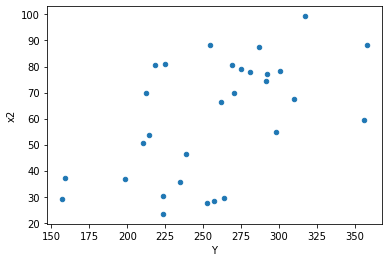

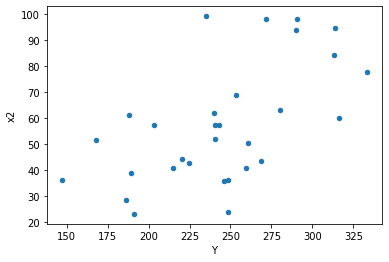

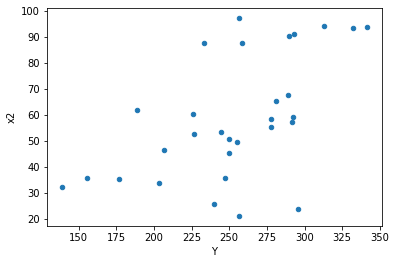

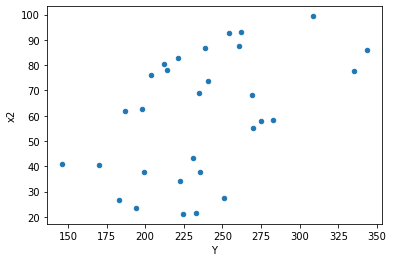

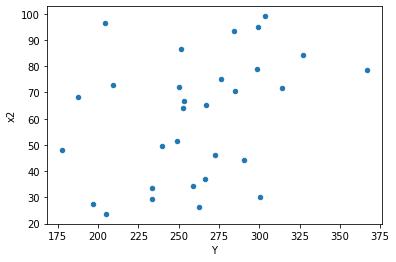

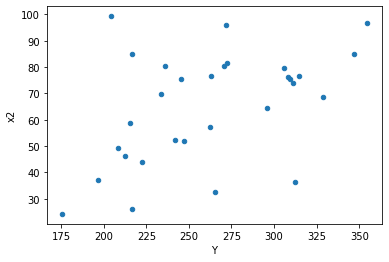

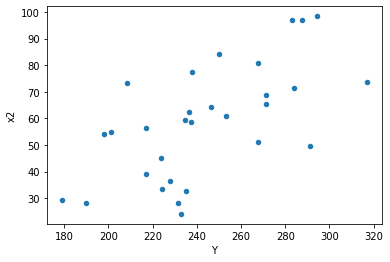

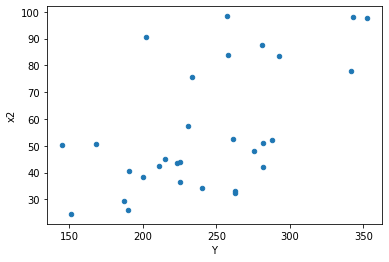

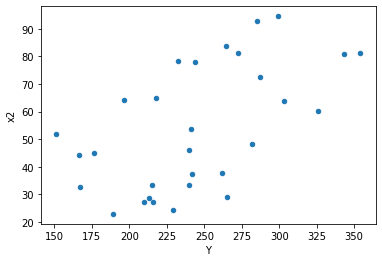

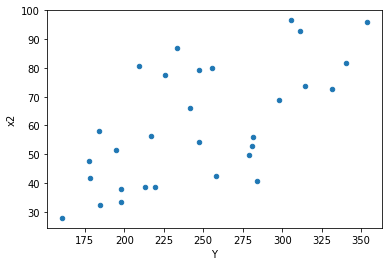

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,8.0,8.0,4.185314208619538,5.640273260189748,0.5231642760774422,0.7050341575237185,1.3476343660348755,0.6830878672333491,0.6584560663833254,0.34154393361667457,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,3.1563122965154333,3.353486100314688,0.39453903706442917,0.419185762539336,1.0624696751385896,0.9338040608565867,0.5330979695717066,0.46690203042829337,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,1.7602588830763028,2.8009886709975405,0.22003236038453786,0.35012358387469256,1.5912367765486939,0.5260656632067238,0.7369671683966381,0.2630328316033619,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,1.0984726890187708,2.6050740429358643,0.13730908612734635,0.32563425536698304,2.3715419317915774,0.24334178517803506,0.8783291074109825,0.12167089258901753,Reject001=1 : Homoscedasticity
10.0,8.0,8.0,3.544455131016275,4.309181334659438,0.44305689137703436,0.5386476668324297,1.2157528238829471,0.7890062993631595,0.6054968503184203,0.39450314968157973,Reject001=1 : Homoscedasticity
12.0,8.0,8.0,2.0019796214642023,6.229321853718541,0.2502474526830253,0.7786652317148176,3.1115810505416417,0.12892974336495744,0.9355351283175213,0.06446487168247872,Reject001=1 : Homoscedasticity
13.0,8.0,8.0,2.1405547756683756,3.0760679486056324,0.26756934695854695,0.38450849357570405,1.4370423889970994,0.6200834692152863,0.6899582653923568,0.31004173460764317,Reject001=1 : Homoscedasticity
15.0,8.0,8.0,3.887505102281161,4.6822251949093046,0.4859381377851451,0.5852781493636631,1.2044293375105302,0.7988762064140589,0.6005618967929706,0.39943810320702944,Reject001=1 : Homoscedasticity
17.0,8.0,8.0,1.5390860865760272,4.000477723367521,0.1923857608220034,0.5000597154209401,2.599255336176354,0.19826133475437002,0.900869332622815,0.09913066737718501,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,3.9700302313495364,3.1974409890634305,0.49625377891869205,0.3996801236329288,0.8053946198733407,0.7669276905987498,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,3.1705918652410294,3.059448345330749,0.3963239831551287,0.38243104316634363,0.9649454976754533,0.960987557362124,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,4.185314208619538,5.640273260189748,0.5231642760774422,0.7050341575237185,1.3476343660348755,0.6830878672333491,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,3.1563122965154333,3.353486100314688,0.39453903706442917,0.419185762539336,1.0624696751385896,0.9338040608565867,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,1.7602588830763028,2.8009886709975405,0.22003236038453786,0.35012358387469256,1.5912367765486939,0.5260656632067238,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,1.0984726890187708,2.6050740429358643,0.13730908612734635,0.32563425536698304,2.3715419317915774,0.24334178517803506,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,4.467605817433795,3.661721472816112,0.5584507271792244,0.457715184102014,0.8196160589027558,0.7852651883908712,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,2.6939450084278302,2.189400177798074,0.3367431260534788,0.27367502222475926,0.8127115330671856,0.7763858128969111,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,5.009383503253126,1.7767780571329688,0.6261729379066407,0.2220972571416211,0.35468996453937246,0.16397329888560677,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      986
Reject001=0 : Heteroscedasticity     14
Name: Result_test, dtype: int64